In [1]:
#basic libraries
import pandas as pd
import numpy as np
from math import *

#graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#system libraries
import os
import statistics
from datetime import datetime

#sklearn
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#tensorflow
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#reading in the dataset
#test = pd.read_csv("digit-recognizer/test.csv")
#train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Cleaning the data

#### Checking for NULLS

In [5]:
test.isnull().values.any()

False

In [6]:
train.isnull().values.any()

False

There are no missing values in either datasets. If there were, we would have filled it with the average value of the datasets

# Fitting, Scaling and Splitting the Data into Train and Test Data

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Users\odyss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

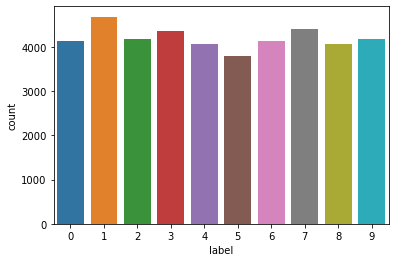

In [9]:
sns.countplot(train['label'])

Text(0.5, 1.0, 'Number 0')

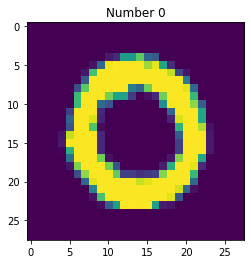

In [10]:
#to show the numbers. This is pretty cool 
zero = train.iloc[1, 1:] #for the first column
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Number 0")

In [11]:
#time for the train test split
x = train.iloc[:, train.columns != 'label']
y = train["label"]

#scale
scaler = StandardScaler()
xScale = scaler.fit_transform(x)

#ok if i don't scale, this is fine
#split 
x_train, x_test, y_train, y_test = train_test_split(xScale, y, test_size = 0.25, random_state=45931)

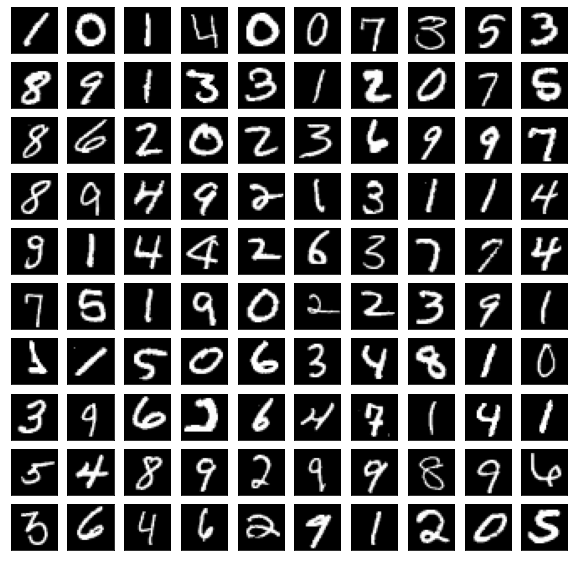

In [12]:
#other visualization
plt.figure(figsize =(10, 10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train.drop('label', axis = 1))[i].reshape(28,28), cmap = 'gray')
plt.show()

# Support Vector Machine

In [ ]:
#library ahoy
model = SVC(kernel = "linear")

#fit the code into SVC
model.fit(x_train,y_train)

#predict
y_pred = model.predict(x_test)

In [ ]:
#results
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test,y_pred))

So we have an accuracy score with 92% using Support Vector Model  
RMSE of 1.35  

# Convoluted Neural Networks

# K Nearest Neighbor

In [3]:
#parse out what is the data verse the label 
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

In [4]:
#split train data set into train and test 
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state=45931)

In [5]:
#get dimensions of train set 
train_shape = x_train.shape
test_shape = x_test.shape
print("train: ", train_shape, "\n", "test: ", test_shape)

train:  (31500, 784) 
 test:  (10500, 784)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

#define classifier 
knn = KNeighborsClassifier(n_neighbors = 5)

#fit model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
#test 
print(knn.score(x_test, y_test))

0.9672380952380952


# Artificial Neural Networks

In [13]:
# Defining the Neural Network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [15]:
# compiling the model with the loss function
# ref-https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [16]:
# predicting the test labels given the tset dataset.
Y_predict = model.predict(test)
Y_predict = np.argmax(Y_predict, axis=1)

# Gradient Descent Back Propogation

In [17]:
# compiling the model with the loss function
# ref-https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics = ['accuracy'])

In [21]:
# One Hot Encoding the labels
Y_train_enc = to_categorical(y_train, num_classes = 10)
Y_train_enc[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
# fitting the model
model.fit(x_train, Y_train_enc, batch_size=100, epochs=100)

Epoch 1/100
315/315 [==============================] - 2s 3ms/step - loss: 2.0403 - accuracy: 0.2985
Epoch 2/100
315/315 [==============================] - 1s 3ms/step - loss: 1.4701 - accuracy: 0.5206
Epoch 3/100
315/315 [==============================] - 1s 3ms/step - loss: 1.1906 - accuracy: 0.6295
Epoch 4/100
315/315 [==============================] - 1s 3ms/step - loss: 1.0000 - accuracy: 0.6936
Epoch 5/100
315/315 [==============================] - 1s 3ms/step - loss: 0.8815 - accuracy: 0.7312
Epoch 6/100
315/315 [==============================] - 1s 3ms/step - loss: 0.7922 - accuracy: 0.7571
Epoch 7/100
315/315 [==============================] - 1s 3ms/step - loss: 0.7215 - accuracy: 0.7833
Epoch 8/100
315/315 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.8015
Epoch 9/100
315/315 [==============================] - 1s 3ms/step - loss: 0.6351 - accuracy: 0.8141
Epoch 10/100
315/315 [==============================] - 1s 3ms/step - loss: 0.6087 - accura

In [24]:
# predicting the test labels given the tset dataset.
Y_predict = model.predict(test)
Y_predict = np.argmax(Y_predict, axis=1)

In [25]:
# printing predictions
Y_predict

array([0, 0, 3, ..., 0, 3, 0], dtype=int64)

# Confusion Matrix

In [27]:
# As we dont have ground truth given with in the text dataset.
# I have created my own test set using the  train set of the given dataset from kaggle using test_train_split.
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state=45931)

In [28]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

Y_predict = model.predict(x_test)

(22050, 784)
(22050,)
(9450, 784)
(9450,)


In [29]:
Y_predict = np.argmax(Y_predict, axis=1)
print(Y_predict)

[2 2 6 ... 9 1 5]


In [30]:
# Accuracy using RMSE
print("Accuracy of ANN:", accuracy_score(y_test,Y_predict))
print("Root Mean Squared Error of ANN:", mean_squared_error(y_test,Y_predict))

Accuracy of ANN: 0.9919576719576719
Root Mean Squared Error of ANN: 0.13058201058201058


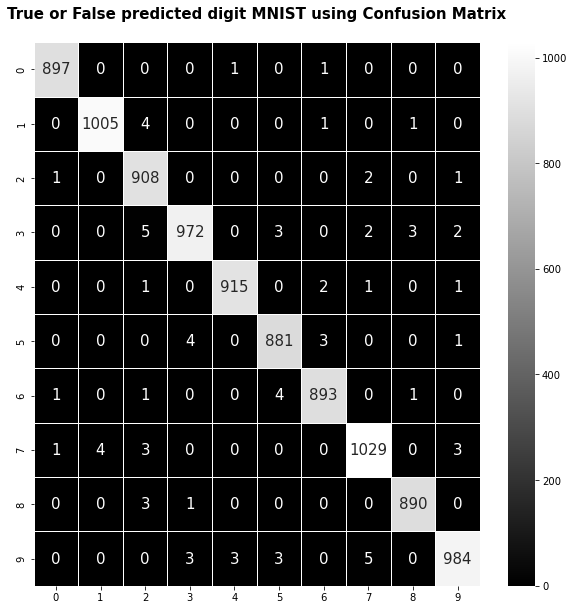

In [31]:
# ref - https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660
# ref - https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5
# Accuracy using confusion matrix
#evaluate the model for testing dataset
con_mat=confusion_matrix(y_test,Y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST using Confusion Matrix\n',fontweight='bold',fontsize=15)
plt.show()

# Performance Metrics

## SVM

Accuracy SVM: 0.9200952380952381  
Root Mean Squared Error of SVM: 1.3564761904761904  


## ANN 
Accuracy of ANN: 0.9975396825396825  
Root Mean Squared Error of ANN: 0.048412698412698414  